# House price prediction using Linear Regression and OLS

## Importing relevant libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Data Dictionary

1. id: Unique ID for each home sold
2. date: Date of the home sale
3. price - Price of each home sold
4. bedrooms - Number of bedrooms
5. bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. sqft_living - Square footage of the apartments interior living space
7. sqft_lot - Square footage of the land space
8. floors - Number of floors
9. waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
10. view - An index from 0 to 4 of how good the view of the property was
11. condition - An index from 1 to 5 on the condition of the apartment,
12. grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
13. sqft_above - The square footage of the interior housing space that is above ground level
14. sqft_basement - The square footage of the interior housing space that is below ground level
15. yr_built - The year the house was initially built
16. yr_renovated - The year of the house’s last renovation
17. zipcode - What zipcode area the house is in
18. lat - Lattitude
19. long - Longitude
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Data exploration and EDA

In [2]:
df = pd.read_csv("E:\LECTURES\SEMESTER 5\DMA\Mini project\\kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.duplicated().sum()

0

## Correlation Heatmap

<Axes: >

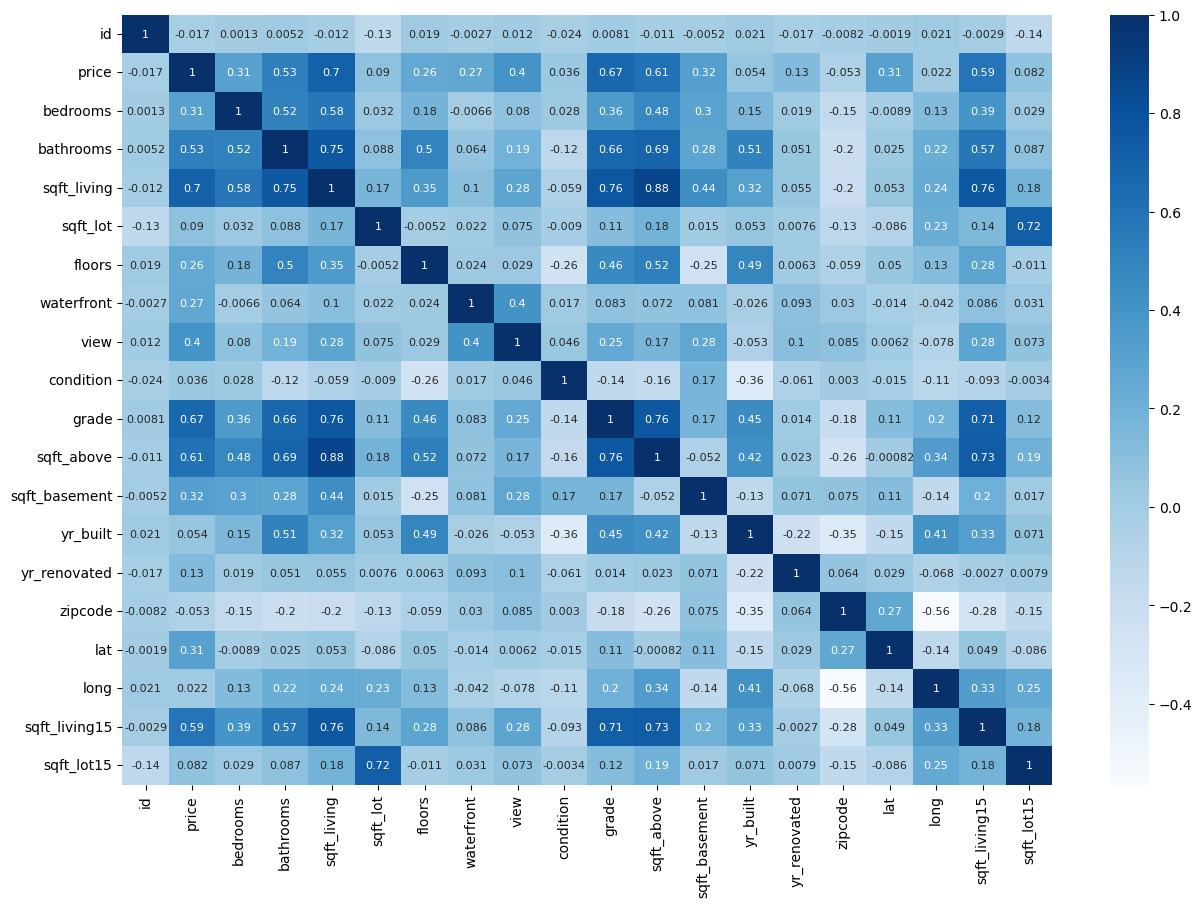

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, annot_kws={"size": 8}, cmap="Blues")

<Axes: title={'center': 'Correlation with price'}>

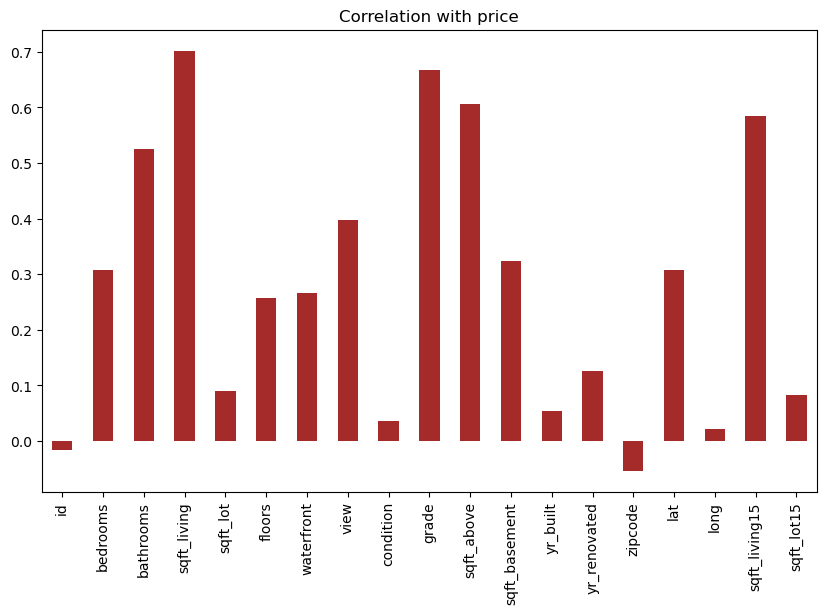

In [9]:
df.drop(["price", "date"], axis=1).corrwith(df.price).plot(kind='bar', figsize=(10,6), title="Correlation with price", color="brown")

In [10]:
# Dropping the columns that aren't related to "price" considering 0.1 as the threshold

df_final = df.drop(columns=["id", "date", "sqft_lot", "condition", "zipcode", "long", "sqft_lot15"])

df_final.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,1955,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1951,1991,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,1933,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,1965,0,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,1987,0,47.6168,1800


In [11]:
df_final.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'sqft_living15'],
      dtype='object')

## Relationship between the continuous numerical attributes

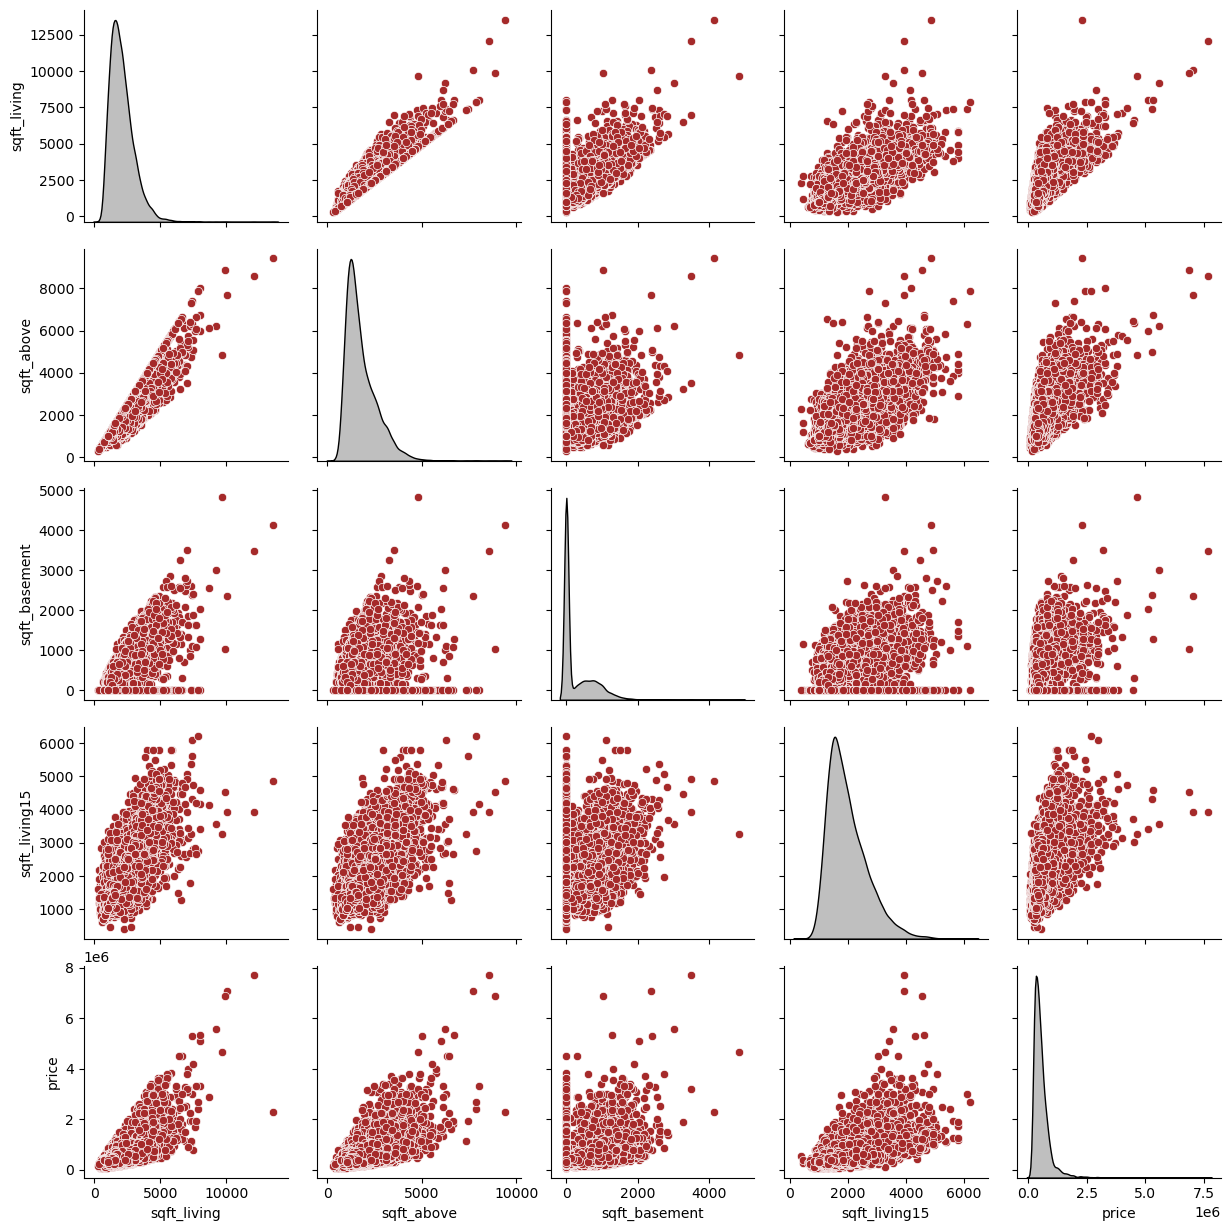

In [12]:
sns.pairplot(df_final[["sqft_living", "sqft_above", "sqft_basement", "sqft_living15", "price"]], diag_kind="kde", plot_kws={"color": "brown"}, diag_kws={"color": "black"})

## Boxplots for the numerical columns

<Axes: ylabel='sqft_living'>

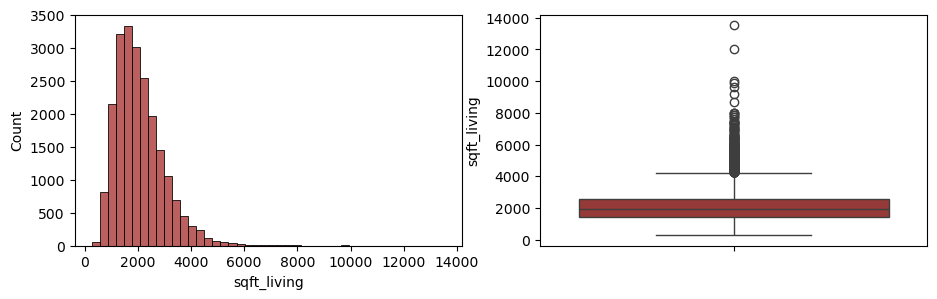

In [13]:
fig1, ax1 = plt.subplots(1, 2, figsize=(11, 3))

sns.histplot(x=df_final["sqft_living"], binwidth=300, ax=ax1[0], color="brown")
sns.boxplot(df_final["sqft_living"], ax=ax1[1], color="brown")

<Axes: ylabel='sqft_above'>

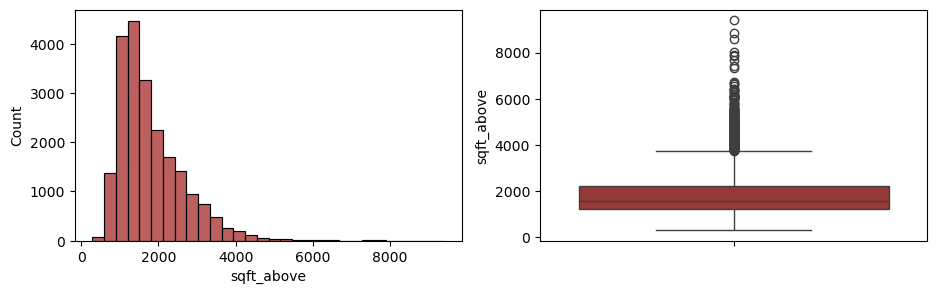

In [14]:
fig2, ax2 = plt.subplots(1, 2, figsize=(11, 3))

sns.histplot(df_final["sqft_above"], binwidth=300, ax=ax2[0], color="brown")
sns.boxplot(df_final["sqft_above"], ax=ax2[1], color="brown")

<Axes: ylabel='sqft_basement'>

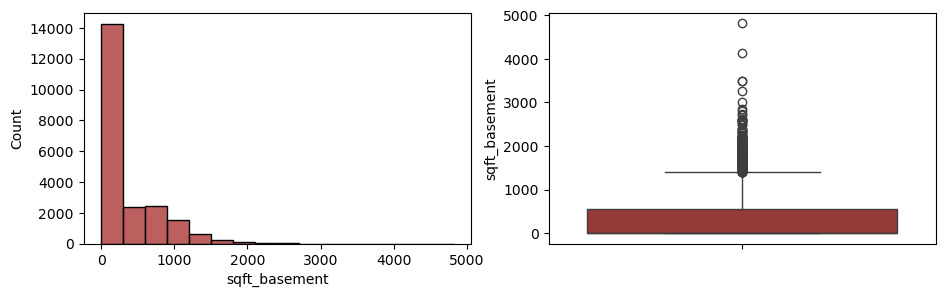

In [15]:
fig3, ax3 = plt.subplots(1, 2, figsize=(11, 3))

sns.histplot(df_final["sqft_basement"], binwidth=300, ax=ax3[0], color="brown")
sns.boxplot(df_final["sqft_basement"], ax=ax3[1], color="brown")

<Axes: ylabel='sqft_living15'>

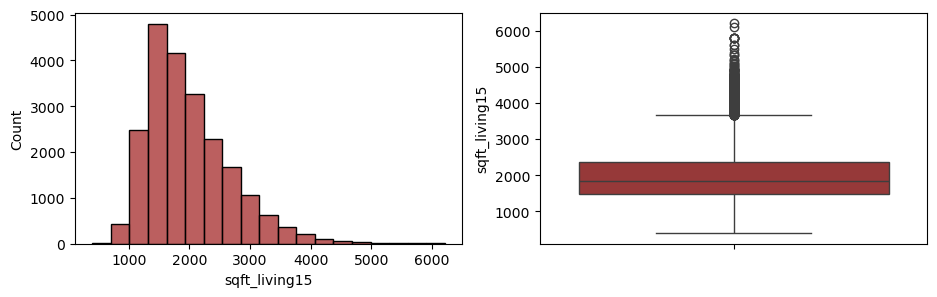

In [16]:
fig4, ax4 = plt.subplots(1, 2, figsize=(11, 3))

sns.histplot(df_final["sqft_living15"], binwidth=300, ax=ax4[0], color="brown")
sns.boxplot(df_final["sqft_living15"], ax=ax4[1], color="brown")

<Axes: xlabel='view', ylabel='price'>

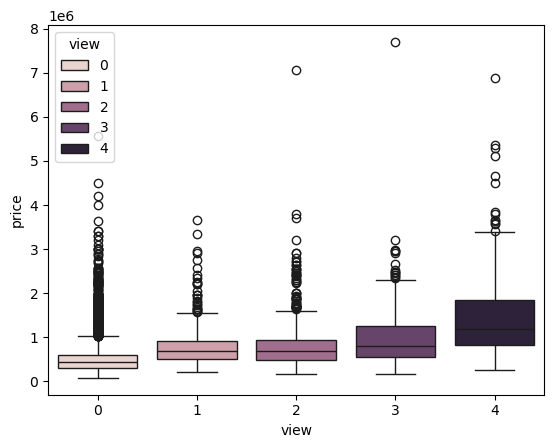

In [17]:
sns.boxplot(x=df_final["view"], y=df_final["price"], hue=df_final["view"])

<Axes: xlabel='grade', ylabel='price'>

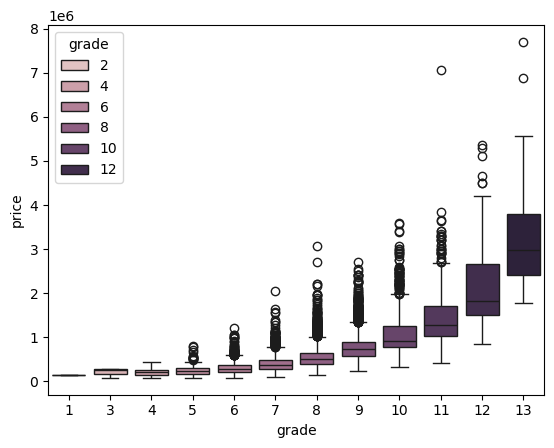

In [18]:
sns.boxplot(x=df_final["grade"], y=df_final["price"], hue=df_final["grade"])


# Grade has values ranging from 1 to 13, where 1 indicates poor construction and 13 indicates excellent quality construction
# From the boxplot, it's evident that a higher grade property is listed at a higher price.

As we can see from the boxplots above, there are many outliers in the columns. But we choose not to remove the outliers because in real estate, some properties that are huge in terms of square feet, or those that are in excellent condition are priced very high. So, the outliers are explainable given these circumstances.

## Splitting the data

In [19]:
X = df_final.drop("price", axis=1)
y = df_final[["price"]]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Multiple Linear Regression(MLR) model instantiation, fitting, and evaluation

In [21]:
model_linear = LinearRegression()

In [22]:
model_linear.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model_linear.predict(X_test)

In [24]:
model_linear.score(X_test, y_test)

0.6923471989730339

In [25]:
linmodel_r2 = r2_score(y_test, y_pred)
linmodel_r2

0.6923471989730339

## Ordinary Least Squares model instantiation, fitting, and evaluation

In [26]:
OLS = sm.OLS(y, X)

In [27]:
model_ols = OLS.fit()

In [28]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          1.542e+04
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:39:25   Log-Likelihood:                     -2.9565e+05
No. Observations:               21613   AIC:                                  5.913e+05
Df Residuals:                   21601   BIC:                                  5.914e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.763e+04   1968.161    -19.121      0.000   -4.15e+04   -3.38e+04
bathrooms      5.833e+04   3389.229     17.211      0.000    5.17e+04     6.5e+04
sqft_living     104.3562      2.360     44.226      0.000      99.731     108.981
floors         2.711e+04   3641.043      7.446      0.000       2e+04    3.42e+04
waterfront     5.855e+05   1.82e+04     32.149      0.000     5.5e+05    6.21e+05
view           4.287e+04   2215.304     19.353      0.000    3.85e+04    4.72e+04
grade          1.172e+05   2189.541     53.526      0.000    1.13e+05    1.21e+05
sqft_above       52.7025      2.270     23.219      0.000      48.253      57.151
sqft_basement    51.6537      2.722     18.974      0.000      46.318      56.990
yr_built      -4112.4188     60.898    -67.529      0.000   -4231.784   -3993.054
yr_renovated     -2.8152      3.756     -0.749      0.454     -10.178       4.547
lat             1.54e+05   2447.924     62.911      0.000    1.49e+05    1.59e+05
sqft_living15    23.4394      3.509      6.681      0.000      16.562      30.316
==============================================================================
Omnibus:                    17119.541   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1406700.120
Skew:                           3.233   Prob(JB):                         0.00
Kurtosis:                      41.990   Cond. No.                     7.23e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.93e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
olsmodel_r2 = model_ols.rsquared
olsmodel_r2

0.8954414689119271

## Comparison of the performance of our models with that of other research papers

In [30]:
regression_tree_score = 0.627
xgboost_score = 0.894

Text(0, 0.5, 'R-squared scores')

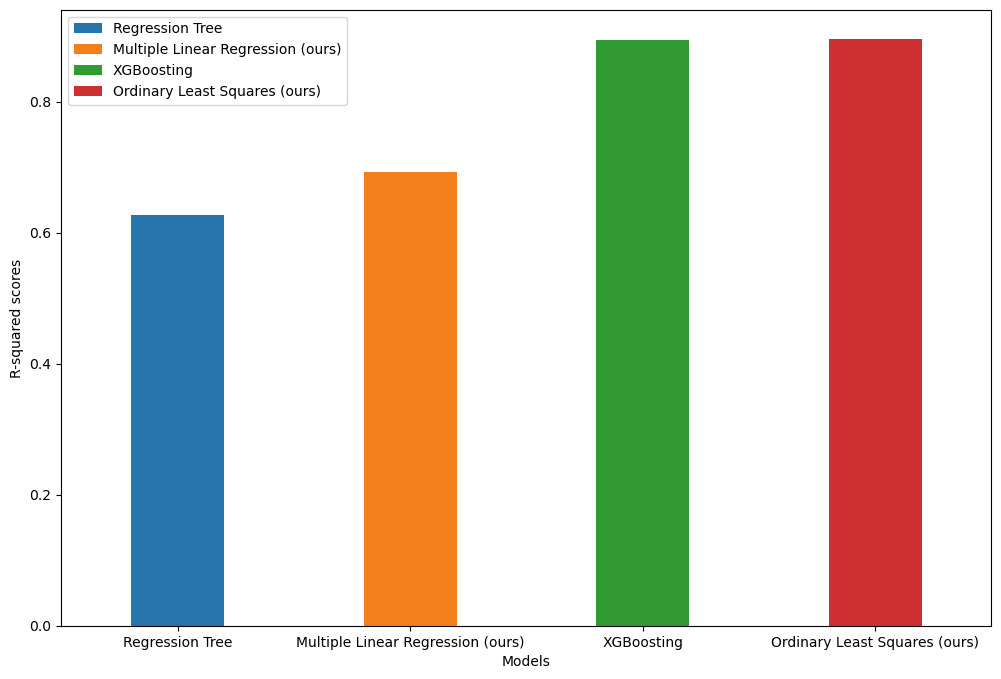

In [31]:
X_labels = ["Regression Tree", "Multiple Linear Regression (ours)", "XGBoosting", "Ordinary Least Squares (ours)"]


plt.figure(figsize=(12, 8))
ax = sns.barplot(x=[0, 1, 2, 3], y=[regression_tree_score, linmodel_r2, xgboost_score, olsmodel_r2], hue=X_labels, width=0.4, saturation=0.9)
ax.set_xticks([0, 1, 2, 3], X_labels)
plt.xlabel("Models")
plt.ylabel("R-squared scores")

## Credits

Manas Bagul, Khushi Vaishnav, Raj Vaidya, Jeet Jagtap, Varun Agarwal 